<h1> HandWritten Digit Recognition

<h2> Installing required libraries

In [163]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [164]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [165]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [166]:
import tensorflow as tf #pip install tensorflow

<h2> Loading data set 

In [167]:
mnist = tf.keras.datasets.mnist 

In [168]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

<h2> Checking size & Images

In [169]:
x_train.shape

(60000, 28, 28)

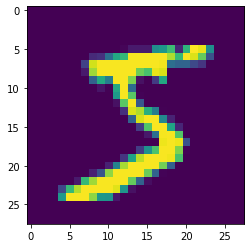

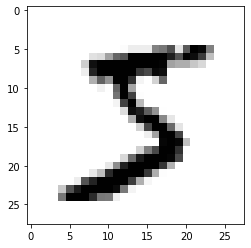

In [170]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) #just checking the number in the array
plt.show()

plt.imshow(x_train[0], cmap = plt.cm.binary) #changing the image to binary

In [171]:
print(x_train[0])#pixel values

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<h2> Normalizing (dividing by 255)

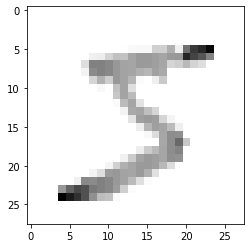

In [172]:
x_train = tf.keras.utils.normalize (x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [173]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [174]:
print (y_train[0])

5


<h2> Reshaping the image(adding 1 extra channel)

In [175]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training sample dimension", x_trainr.shape)
print("Testing sample dimenstion", x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimenstion (10000, 28, 28, 1)


<h2> Importing and applying model(CNN)

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [177]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('Softmax'))

In [178]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_24 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_25 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [179]:
print("Total Training samples = ", len(x_trainr))

Total Training samples =  60000


<h2> Compiling the model

In [180]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

<h2> Training the model with 100 epochs

In [181]:
history=model.fit(x_trainr, y_train, epochs=100, validation_split = 0.3)

Epoch 1/100


2022-05-05 21:41:03.682631: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131712000 exceeds 10% of free system memory.


1313/1313 [==============================] - 20s 15ms/step - loss: 0.3177 - accuracy: 0.8992 - val_loss: 0.1464 - val_accuracy: 0.9546
Epoch 2/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.1052 - accuracy: 0.9679 - val_loss: 0.1024 - val_accuracy: 0.9662
Epoch 3/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 4/100
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0655 - val_accuracy: 0.9803
Epoch 5/100
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0751 - val_accuracy: 0.9782
Epoch 6/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0671 - val_accuracy: 0.9810
Epoch 7/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0607 - val_

In [199]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data()
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training sample dimension", x_trainr.shape)
print("Testing sample dimenstion", x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimenstion (10000, 28, 28, 1)


<h2> Evaluating the accuracy

In [200]:
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train Loss on 60,000 train samples", train_loss)
print("Validation accuracy on 60,000 train samples", train_acc)

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation accuracy on 10,000 test samples", test_acc)

1875/1875 [==============================] - 7s 4ms/step - loss: 859.8018 - accuracy: 0.8335
Train Loss on 60,000 train samples 859.8018188476562
Validation accuracy on 60,000 train samples 0.833466649055481
313/313 [==============================] - 1s 4ms/step - loss: 812.7838 - accuracy: 0.8432
Test Loss on 10,000 test samples 812.7837524414062
Validation accuracy on 10,000 test samples 0.8432000279426575


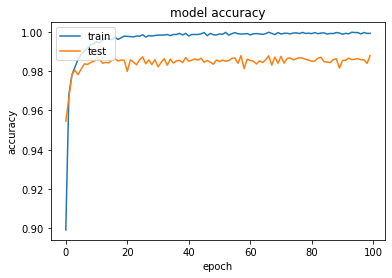

In [201]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

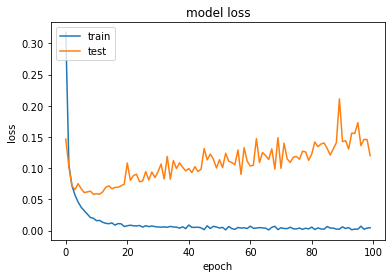

In [202]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [203]:
predictions = model.predict([x_testr])

In [204]:
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


4


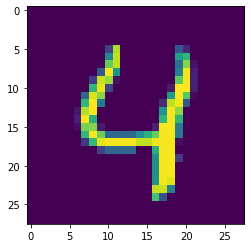

In [205]:
print(np.argmax(predictions[4]))
plt.imshow(x_test[4])

8


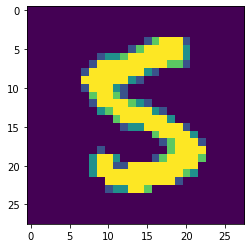

In [206]:
print(np.argmax(predictions[132]))
plt.imshow(x_test[132])

In [207]:
import cv2

<h2> Now checking the predictions on our own images

Prediction is: 5


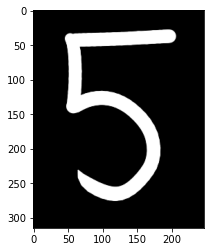

In [208]:
img = cv2.imread('05.png')
plt.imshow(img)

#img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#changing from color to gray
#gray.shape
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)#changing the size to 28x28
#resized.shape
newimg = tf.keras.utils.normalize(resized, axis = 1)#normalizing
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)#adding channel
#newimg.shape
predictions = model.predict(newimg)#predicting

print("Prediction is:",np.argmax(predictions))

Prediction is: 3


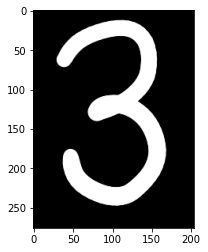

In [209]:
img = cv2.imread('3.png')
plt.imshow(img)

#img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray.shape
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
#resized.shape
newimg = tf.keras.utils.normalize(resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)
#newimg.shape
predictions = model.predict(newimg)

print("Prediction is:",np.argmax(predictions))

Prediction is: 4


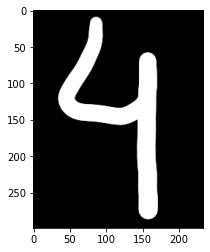

In [210]:
img = cv2.imread('4.png')
plt.imshow(img)

#img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray.shape
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
#resized.shape
newimg = tf.keras.utils.normalize(resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)
#newimg.shape
predictions = model.predict(newimg)

print("Prediction is:",np.argmax(predictions))

Prediction is: 2


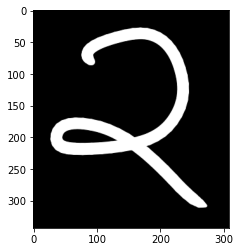

In [211]:
img = cv2.imread('2.png')
plt.imshow(img)

#img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray.shape
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
#resized.shape
newimg = tf.keras.utils.normalize(resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)
#newimg.shape
predictions = model.predict(newimg)

print("Prediction is:",np.argmax(predictions))

Prediction is: 7


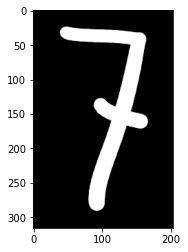

In [212]:
img = cv2.imread('7.png')
plt.imshow(img)

#img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray.shape
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
#resized.shape
newimg = tf.keras.utils.normalize(resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)
#newimg.shape
predictions = model.predict(newimg)

print("Prediction is:",np.argmax(predictions))

Prediction is: 5


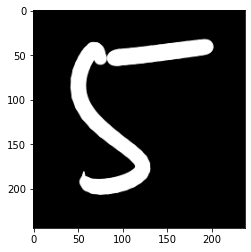

In [213]:
img = cv2.imread('15.png')
plt.imshow(img)

#img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray.shape
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
#resized.shape
newimg = tf.keras.utils.normalize(resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)
#newimg.shape
predictions = model.predict(newimg)

print("Prediction is:",np.argmax(predictions))

Prediction is: 6


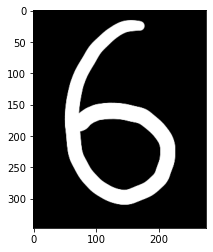

In [214]:
img = cv2.imread('6.png')
plt.imshow(img)

#img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray.shape
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
#resized.shape
newimg = tf.keras.utils.normalize(resized, axis = 1)
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)
#newimg.shape
predictions = model.predict(newimg)

print("Prediction is:",np.argmax(predictions))